In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download grassknoted/asl-alphabet

100% 1.02G/1.03G [00:05<00:00, 240MB/s]
100% 1.03G/1.03G [00:05<00:00, 215MB/s]


In [ ]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import skimage
from skimage.transform import resize
from IPython.display import Image, display

import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
train_path = '/content/asl_alphabet_train/asl_alphabet_train'
test_path = '/content/asl_alphabet_test/asl_alphabet_test'

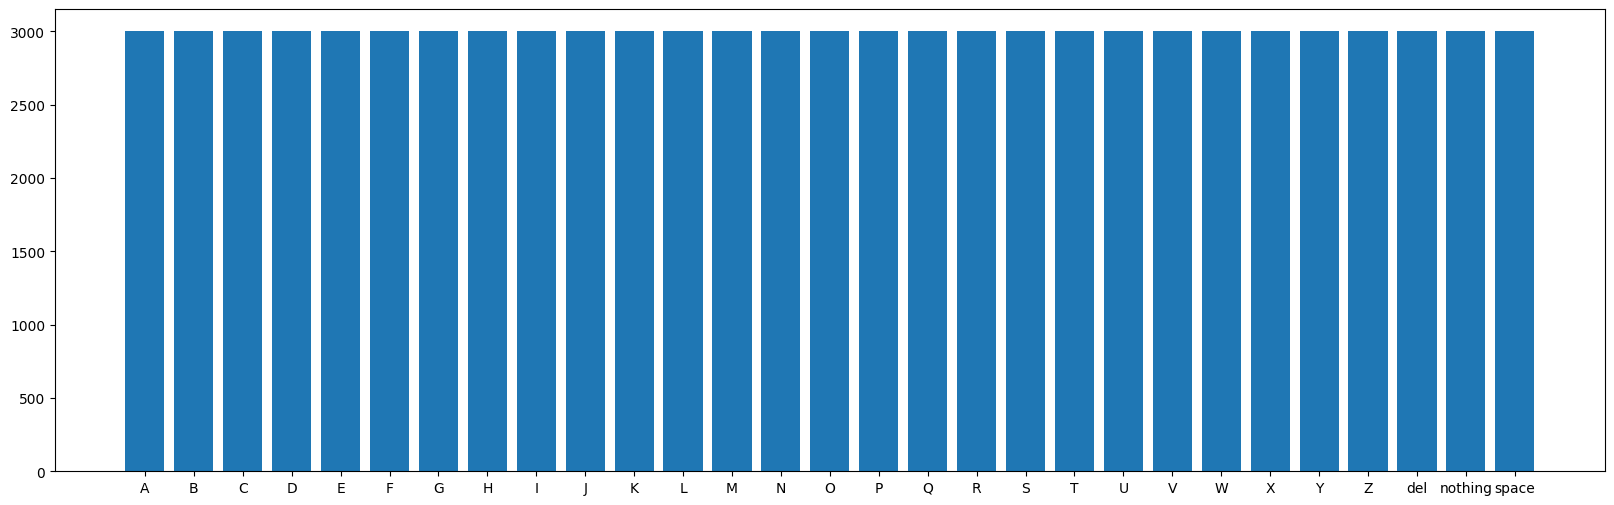

In [ ]:
classes = sorted(os.listdir(train_path))
numbers = []

for i in classes:
  numbers.append(len(os.listdir(train_path + '/' + i)))
  
plt.figure(figsize = (20,6))
plt.bar(classes, numbers)
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

A


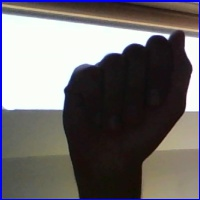

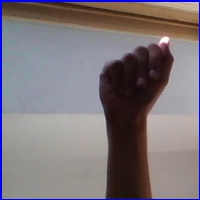

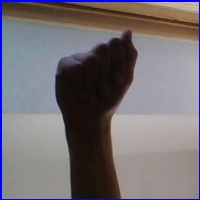

There are 3000 images in A class.

B


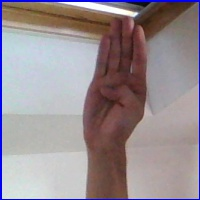

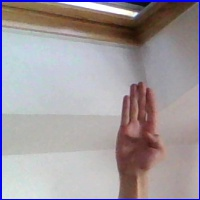

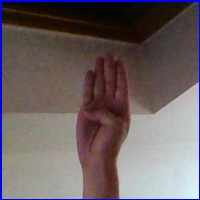

There are 3000 images in B class.

C


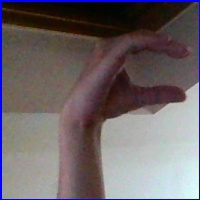

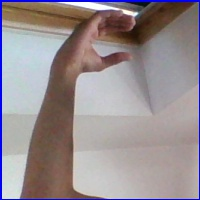

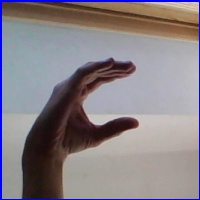

There are 3000 images in C class.

D


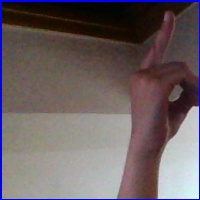

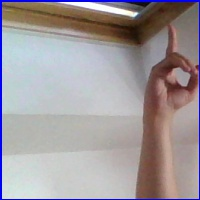

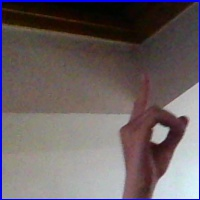

There are 3000 images in D class.

E


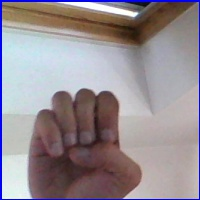

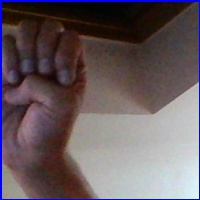

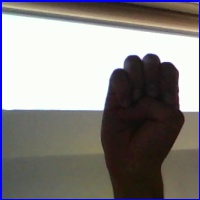

There are 3000 images in E class.

F


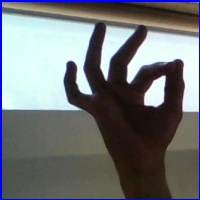

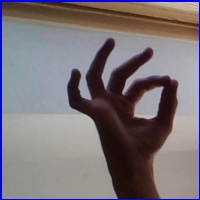

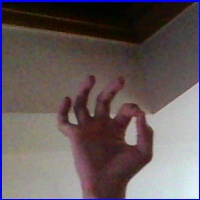

There are 3000 images in F class.

G


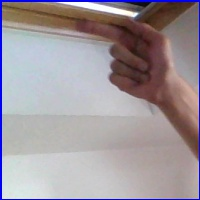

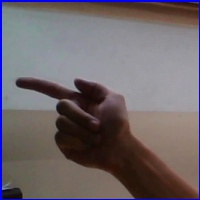

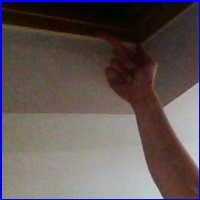

There are 3000 images in G class.

H


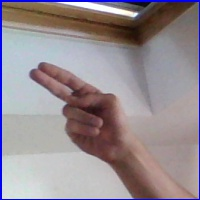

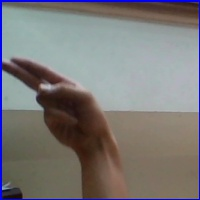

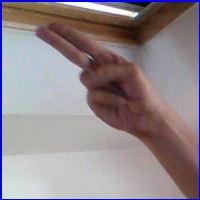

There are 3000 images in H class.

I


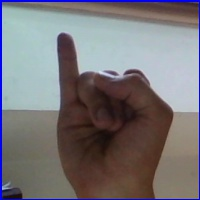

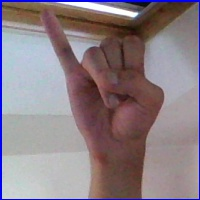

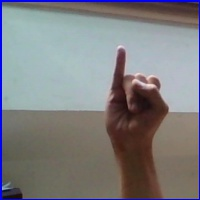

There are 3000 images in I class.

J


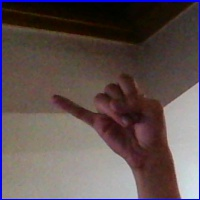

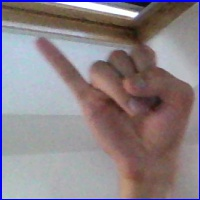

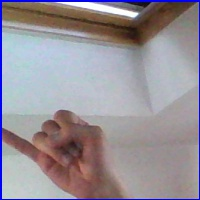

There are 3000 images in J class.

K


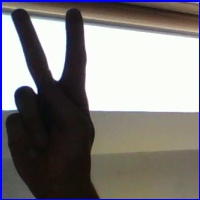

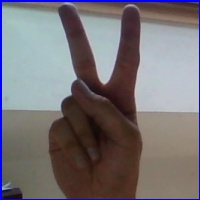

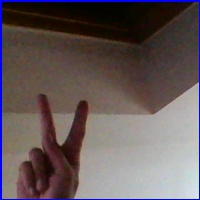

There are 3000 images in K class.

L


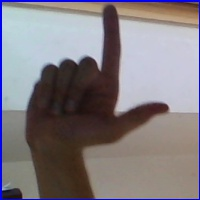

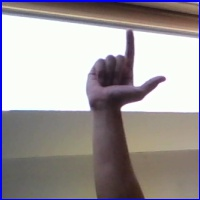

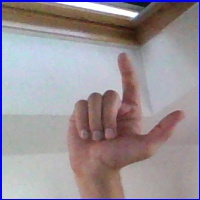

There are 3000 images in L class.

M


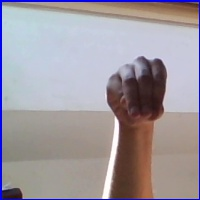

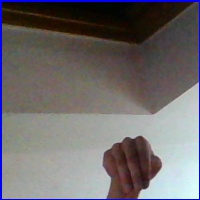

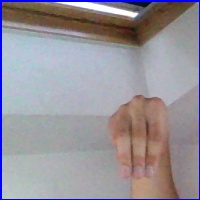

There are 3000 images in M class.

N


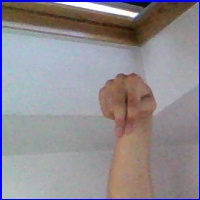

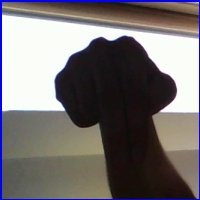

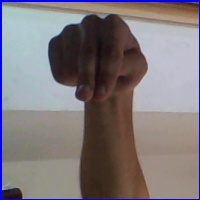

There are 3000 images in N class.

O


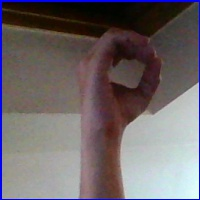

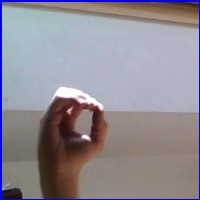

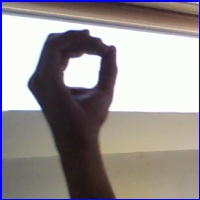

There are 3000 images in O class.

P


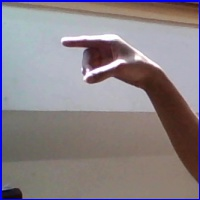

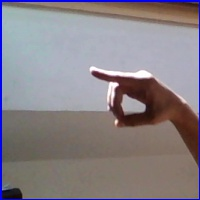

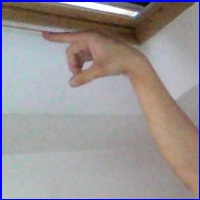

There are 3000 images in P class.

Q


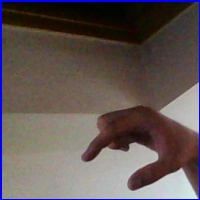

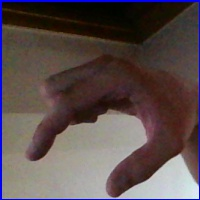

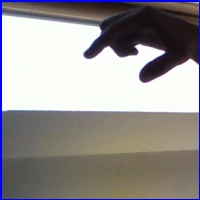

There are 3000 images in Q class.

R


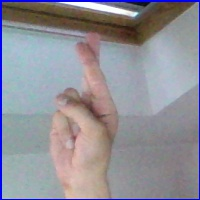

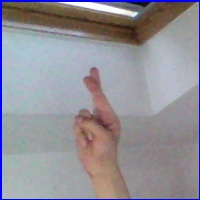

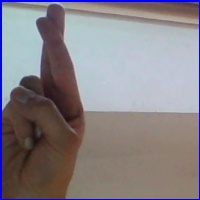

There are 3000 images in R class.

S


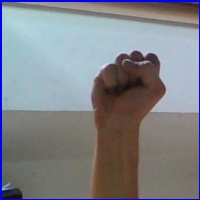

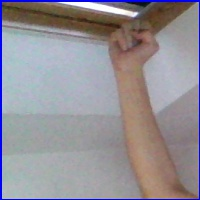

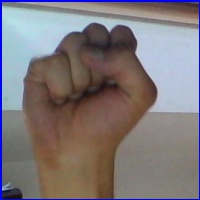

There are 3000 images in S class.

T


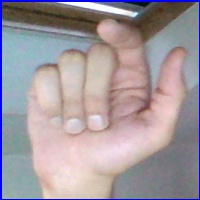

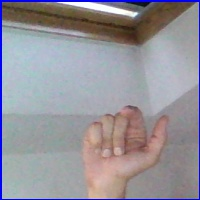

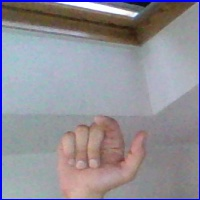

There are 3000 images in T class.

U


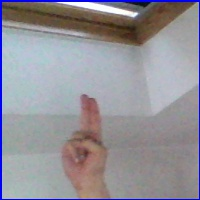

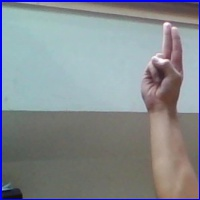

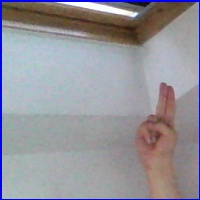

There are 3000 images in U class.

V


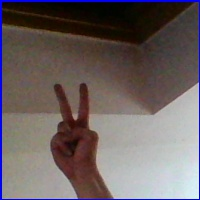

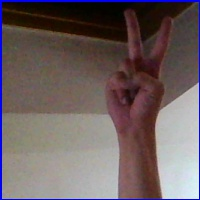

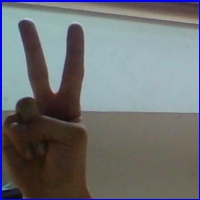

There are 3000 images in V class.

W


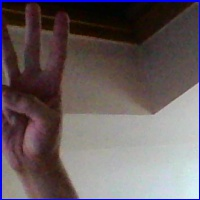

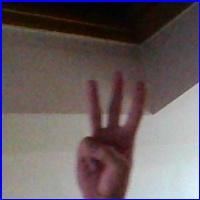

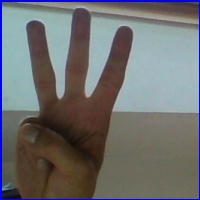

There are 3000 images in W class.

X


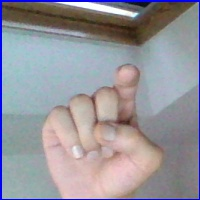

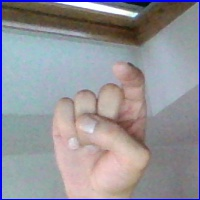

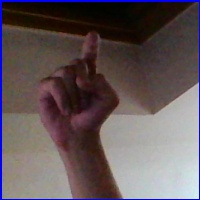

There are 3000 images in X class.

Y


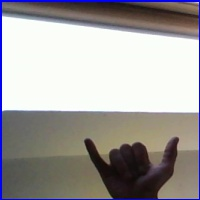

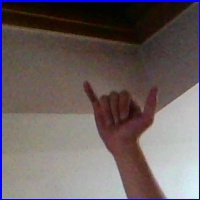

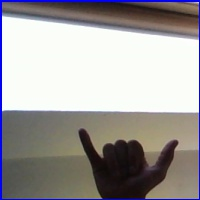

There are 3000 images in Y class.

Z


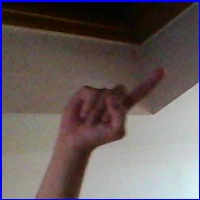

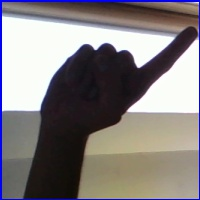

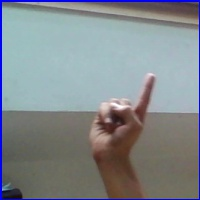

There are 3000 images in Z class.

del


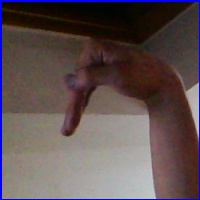

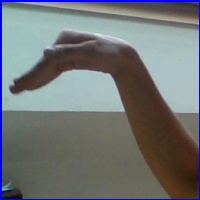

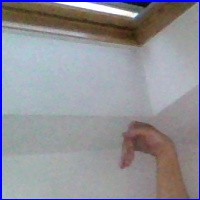

There are 3000 images in del class.

nothing


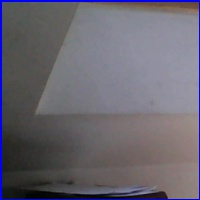

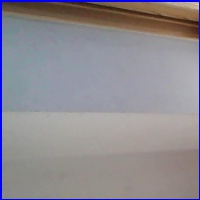

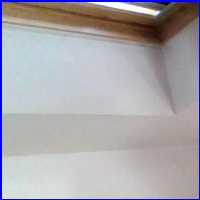

There are 3000 images in nothing class.

space


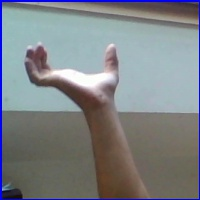

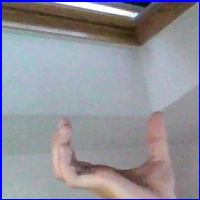

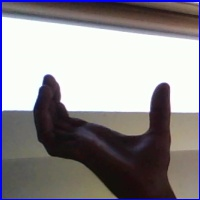

There are 3000 images in space class.


In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

for i in labels:
  path = train_path + '/' + i
  folder_data = os.listdir(path)
  k = 0
  print("")
  print(i)
  for image_path in folder_data:
    if k < 3:
      display(Image(path + '/' + image_path))
    k += 1
  print('There are', k, 'images in', i, 'class.')

In [ ]:
def obtain_data(data_dir):
  images = []
  labels = []
  dir_list = sorted(os.listdir(data_dir))
  for i in range(len(dir_list)):
    print('Obtaining', dir_list[i], 'images.')
    for image in os.listdir(data_dir + '/' + dir_list[i]):
      img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
      img = cv2.resize(img, (32, 32))
      images.append(img)
      labels.append(i)
  return images, labels

x, y = obtain_data(train_path)

Obtaining A images.
Obtaining B images.
Obtaining C images.
Obtaining D images.
Obtaining E images.
Obtaining F images.
Obtaining G images.
Obtaining H images.
Obtaining I images.
Obtaining J images.
Obtaining K images.
Obtaining L images.
Obtaining M images.
Obtaining N images.
Obtaining O images.
Obtaining P images.
Obtaining Q images.
Obtaining R images.
Obtaining S images.
Obtaining T images.
Obtaining U images.
Obtaining V images.
Obtaining W images.
Obtaining X images.
Obtaining Y images.
Obtaining Z images.
Obtaining del images.
Obtaining nothing images.
Obtaining space images.


In [ ]:
def preprocess_data(x, y):
  np_x = np.array(x)
  normalised_x = np_x.astype('float32') / 255
  label_encoded_y = utils.to_categorical(y)
  x_train, x_valtest, y_train, y_valtest = train_test_split(normalised_x, label_encoded_y, train_size = 0.8)
  x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size = 0.5)
  return x_train, x_val, x_test, y_train, y_val, y_test

x_train, x_val, x_test, y_train, y_val, y_test = preprocess_data(x, y)

In [ ]:
print("Training data:", x_train.shape)
print("Validation data:", x_val.shape)
print("Test data:", x_test.shape)

Training data: (69600, 32, 32, 3)
Validation data: (8700, 32, 32, 3)
Test data: (8700, 32, 32, 3)


In [ ]:
mobilenetv2_model = tf.keras.applications.MobileNetV2(input_shape = (32,32,3), include_top = False, weights = 'imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobilenetv2_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
for layer in mobilenetv2_model.layers:
  layer.trainable = False

In [ ]:
mobilenetv2_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
model = tf.keras.Sequential([
  mobilenetv2_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1000, activation = 'relu'),
  tf.keras.layers.Dense(29, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              1281000   
                                                                 
 dense_1 (Dense)             (None, 29)                29029     
                                                                 
Total params: 3,568,013
Trainable params: 1,310,029
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
base_learning_rate = 0.0001

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
2175/2175 [==============================] - 134s 60ms/step - loss: 2.8019 - accuracy: 0.2338 - val_loss: 2.4959 - val_accuracy: 0.2959
Epoch 2/10
2175/2175 [==============================] - 124s 57ms/step - loss: 2.3770 - accuracy: 0.3219 - val_loss: 2.3025 - val_accuracy: 0.3356
Epoch 3/10
2175/2175 [==============================] - 123s 56ms/step - loss: 2.2273 - accuracy: 0.3577 - val_loss: 2.1890 - val_accuracy: 0.3702
Epoch 4/10
2175/2175 [==============================] - 126s 58ms/step - loss: 2.1234 - accuracy: 0.3868 - val_loss: 2.0984 - val_accuracy: 0.3867
Epoch 5/10
2175/2175 [==============================] - 126s 58ms/step - loss: 2.0375 - accuracy: 0.4096 - val_loss: 2.0211 - val_accuracy: 0.4138
Epoch 6/10
2175/2175 [==============================] - 124s 57ms/step - loss: 1.9634 - accuracy: 0.4314 - val_loss: 1.9542 - val_accuracy: 0.4299
Epoch 7/10
2175/2175 [==============================] - 122s 56ms/step - loss: 1.8978 - accuracy: 0.4500 - val_loss: 1

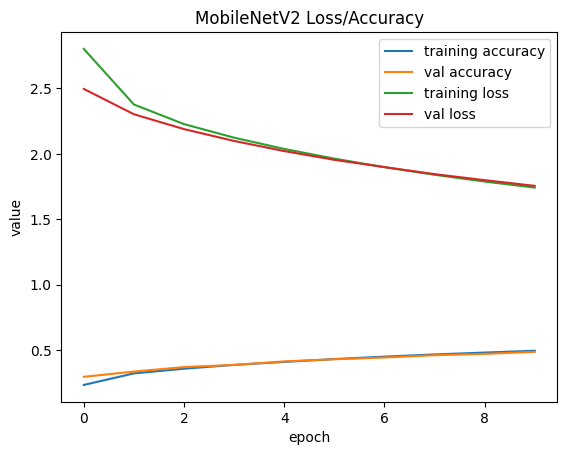

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('MobileNetV2 Loss/Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

272/272 [==============================] - 11s 40ms/step - loss: 1.7378 - accuracy: 0.4915
Test Accuracy: 0.49149423837661743
Test Loss: 1.737813949584961


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = -1)
y_pred

272/272 [==============================] - 12s 39ms/step


array([14, 22, 27, ..., 24, 26, 11])

In [ ]:
y_testing = np.argmax(y_test, axis = 1)
y_testing

array([14, 22,  7, ..., 24, 26, 11])

In [ ]:
print('The accuracy obtained on the test set using MobileNetV2 is:', accuracy_score(y_pred, y_testing))

The accuracy obtained on the test set using MobileNetV2 is: 0.49149425287356324


In [ ]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.41      0.48       322
           1       0.42      0.40      0.41       289
           2       0.73      0.51      0.60       316
           3       0.64      0.43      0.51       311
           4       0.43      0.27      0.33       298
           5       0.49      0.50      0.50       324
           6       0.60      0.57      0.58       309
           7       0.59      0.68      0.63       309
           8       0.47      0.44      0.46       307
           9       0.57      0.58      0.58       292
          10       0.57      0.49      0.52       294
          11       0.42      0.57      0.49       281
          12       0.39      0.42      0.40       302
          13       0.58      0.44      0.50       316
          14       0.19      0.67      0.30       292
          15       0.66      0.48      0.55       273
          16       0.61      0.72      0.66       292
          17       0.36    

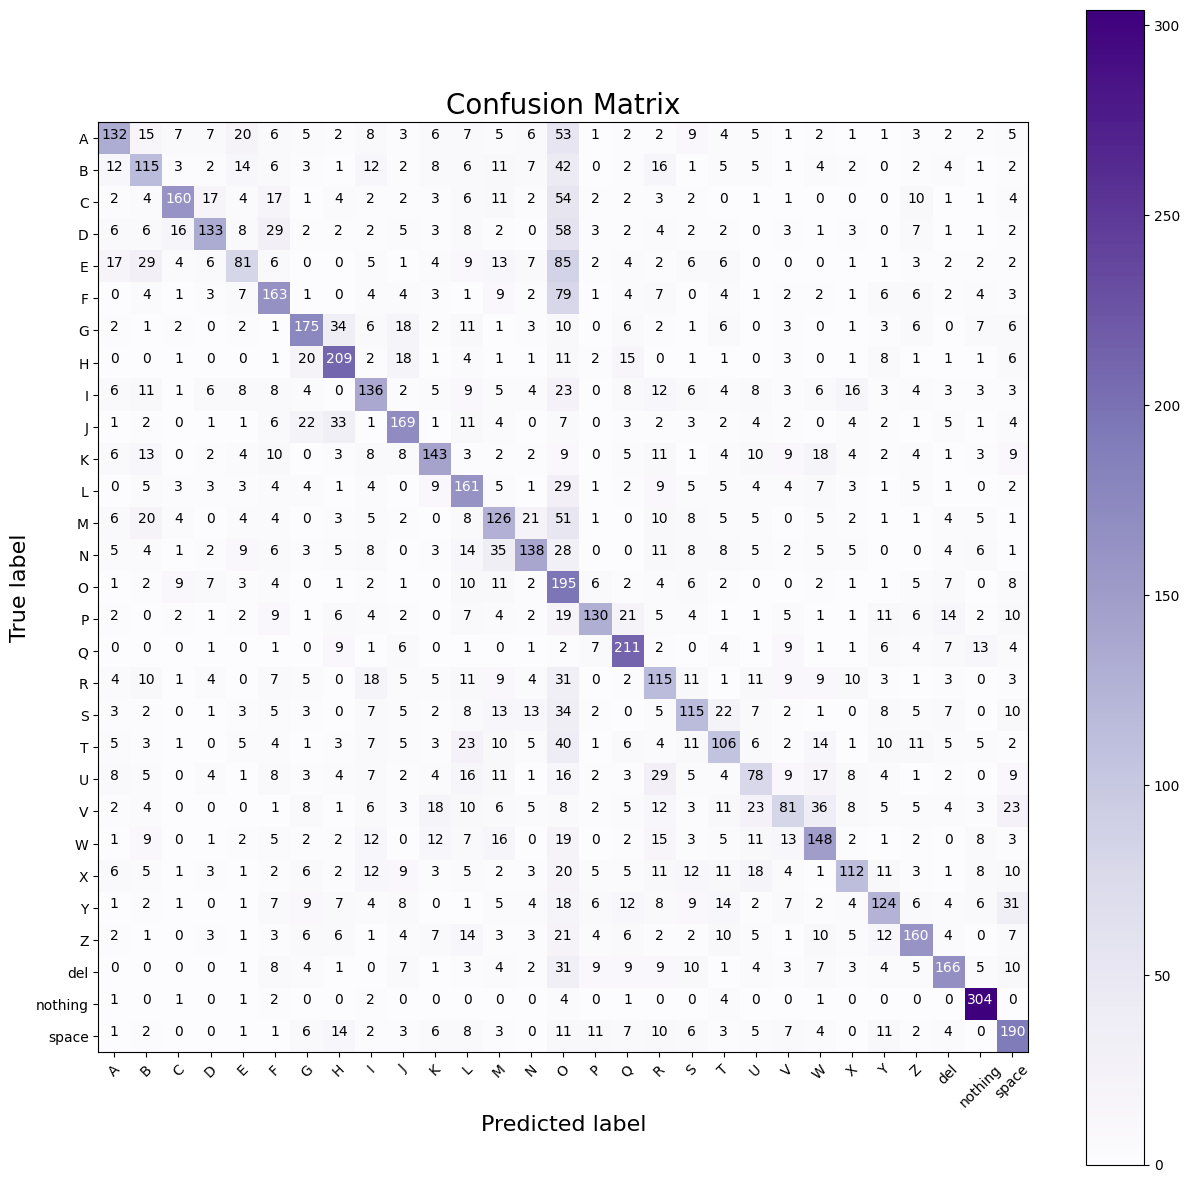

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_testing, y_pred)

In [ ]:
print("Number of layers in the base model:", len(mobilenetv2_model.layers))

Number of layers in the base model: 154


In [ ]:
for layer in mobilenetv2_model.layers:
  layer.trainable = True

In [ ]:
mobilenetv2_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              1281000   
                                                                 
 dense_1 (Dense)             (None, 29)                29029     
                                                                 
Total params: 3,568,013
Trainable params: 3,533,901
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate/10), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
historyft = model.fit(x_train, y_train, epochs = 20, initial_epoch = history.epoch[-1], validation_data = (x_val, y_val))

Epoch 10/20
2175/2175 [==============================] - 673s 301ms/step - loss: 13.2159 - accuracy: 0.1046 - val_loss: 3.7929 - val_accuracy: 0.0636
Epoch 11/20
2175/2175 [==============================] - 653s 300ms/step - loss: 3.3873 - accuracy: 0.1889 - val_loss: 2.8932 - val_accuracy: 0.2025
Epoch 12/20
2175/2175 [==============================] - 666s 306ms/step - loss: 2.5108 - accuracy: 0.2894 - val_loss: 2.1260 - val_accuracy: 0.4028
Epoch 13/20
2175/2175 [==============================] - 648s 298ms/step - loss: 2.0228 - accuracy: 0.3976 - val_loss: 1.6081 - val_accuracy: 0.5271
Epoch 14/20
2175/2175 [==============================] - 641s 295ms/step - loss: 1.6709 - accuracy: 0.4899 - val_loss: 1.2361 - val_accuracy: 0.6290
Epoch 15/20
2175/2175 [==============================] - 632s 291ms/step - loss: 1.3577 - accuracy: 0.5760 - val_loss: 0.9368 - val_accuracy: 0.7113
Epoch 16/20
2175/2175 [==============================] - 634s 291ms/step - loss: 1.1269 - accuracy: 0.642

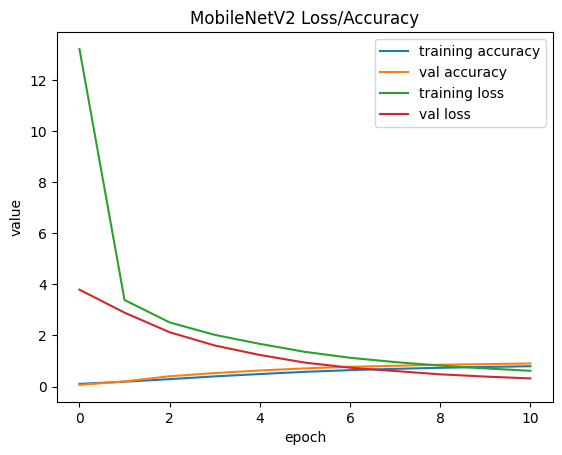

In [ ]:
plt.figure()
plt.plot(historyft.history['accuracy'], label='training accuracy')
plt.plot(historyft.history['val_accuracy'], label='val accuracy')
plt.plot(historyft.history['loss'], label='training loss')
plt.plot(historyft.history['val_loss'], label='val loss')
plt.title('MobileNetV2 Loss/Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

272/272 [==============================] - 12s 43ms/step - loss: 0.3147 - accuracy: 0.9072
Test Accuracy: 0.9072414040565491
Test Loss: 0.3146519660949707


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = -1)
y_pred

272/272 [==============================] - 12s 40ms/step


array([14, 22,  6, ..., 24, 26, 11])

In [ ]:
y_testing = np.argmax(y_test, axis = 1)
y_testing

array([14, 22,  7, ..., 24, 26, 11])

In [ ]:
print('The accuracy obtained on the test set using MobileNetV2 is:', accuracy_score(y_pred, y_testing))

The accuracy obtained on the test set using MobileNetV2 is: 0.9072413793103449


In [ ]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83       322
           1       0.84      0.87      0.85       289
           2       0.98      0.99      0.98       316
           3       0.91      0.92      0.92       311
           4       0.85      0.80      0.82       298
           5       0.92      0.97      0.94       324
           6       0.96      0.97      0.97       309
           7       0.96      0.96      0.96       309
           8       0.92      0.93      0.92       307
           9       0.97      0.99      0.98       292
          10       0.89      0.93      0.91       294
          11       0.95      0.99      0.97       281
          12       0.91      0.86      0.88       302
          13       0.90      0.95      0.92       316
          14       0.94      0.90      0.92       292
          15       0.99      0.98      0.98       273
          16       0.98      0.98      0.98       292
          17       0.79    

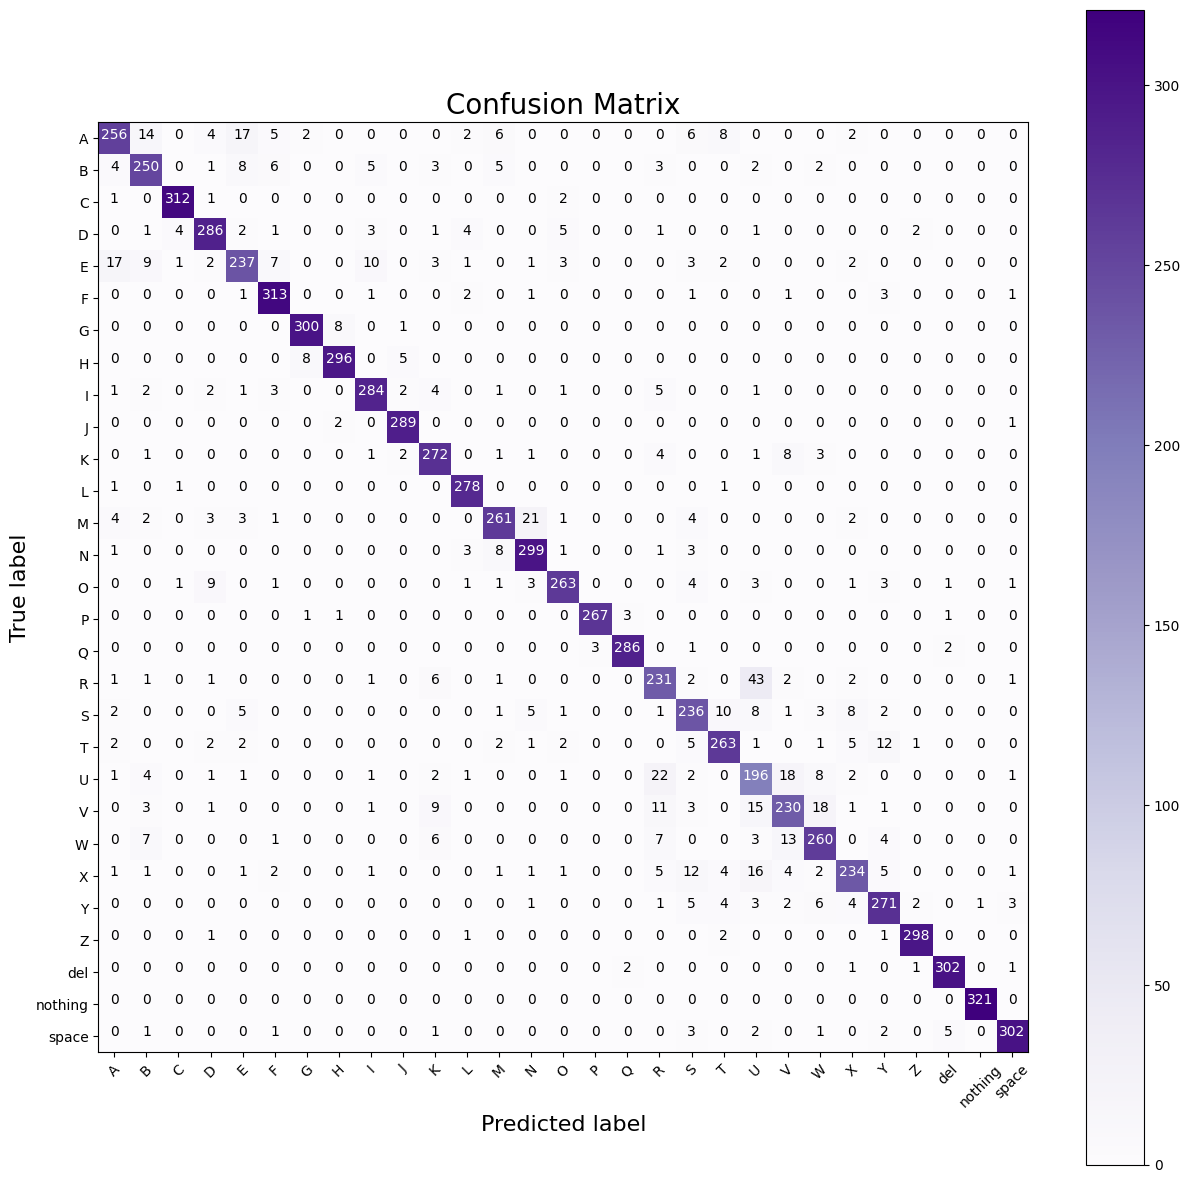

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_testing, y_pred)

1/1 [==============================] - 0s 30ms/step
Prediction of image is: C



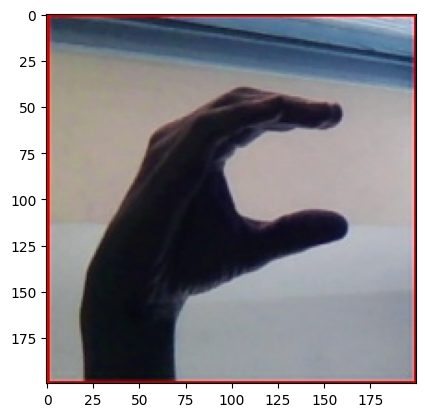

In [ ]:
testimage = []
img = cv2.imread('/content/asl_alphabet_test/asl_alphabet_test/C_test.jpg')
plt.imshow(img)
img = cv2.resize(img, (32, 32))
testimage.append(img)
np_x = np.array(testimage)
imge = np_x.astype('float32') / 255
predict = np.argmax(model.predict(imge), axis = -1)

if predict[0] == 0:
  prediction = 'A'
elif predict[0] == 1:
  prediction = 'B'
elif predict[0] == 2:
  prediction = 'C'
elif predict[0] == 3:
  prediction = 'D'
elif predict[0] == 4:
  prediction = 'E'
elif predict[0] == 5:
  prediction = 'F'
elif predict[0] == 6:
  prediction = 'G'
elif predict[0] == 7:
  prediction = 'H'
elif predict[0] == 8:
  prediction = 'I'
elif predict[0] == 9:
  prediction = 'J'
elif predict[0] == 10:
  prediction = 'K'
elif predict[0] == 11:
  prediction = 'L'
elif predict[0] == 12:
  prediction = 'M'
elif predict[0] == 13:
  prediction = 'N'
elif predict[0] == 14:
  prediction = 'O'
elif predict[0] == 15:
  prediction = 'P'
elif predict[0] == 16:
  prediction = 'Q'
elif predict[0] == 17:
  prediction = 'R'
elif predict[0] == 18:
  prediction = 'S'
elif predict[0] == 19:
  prediction = 'T'
elif predict[0] == 20:
  prediction = 'U'
elif predict[0] == 21:
  prediction = 'V'
elif predict[0] == 22:
  prediction = 'W'
elif predict[0] == 23:
  prediction = 'X'
elif predict[0] == 24:
  prediction = 'Y'
elif predict[0] == 25:
  prediction = 'Z'
elif predict[0] == 26:
  prediction = 'del'
elif predict[0] == 27:
  prediction = 'nothing'
elif predict[0] == 28:
  prediction = 'space'
else:
  prediction = 'invalid'
    
print('Prediction of image is:', prediction)
print('')